# Lectura de los datoss

In [2]:
# Importamos la data 
import pandas as pd

df = pd.read_excel("/home/jeffpretellds/Documents/VISUAL CODE/CIENCIADEDATOSUDEMY/Machine Learning/CasoSiniestros/Data_Siniestros en Seguros .xlsx")

In [3]:
df.columns

Index(['Cliente_ID', 'Antigüedad_Maxima', 'Nivel_Ingresos', 'Saldo_Pendiente',
       'Puntaje_Morosidad1', 'Puntaje_Morosidad2', 'Puntaje_Morosidad3',
       'Puntaje_Morosidad4', 'Puntaje_Morosidad5', 'Puntaje_Morosidad6',
       'Saldo_Pendiente_Seg', 'Siniestros1', 'Siniestros2', 'Siniestros3',
       'Siniestros4', 'Siniestros5', 'Siniestros6', 'Estado_Siniestro'],
      dtype='object')

# Limpieza de datos

Descartaremos la eliminaciòn de variables.

Tenemos dos formas para limpiar la data para comparar cuàl dio mejores resultados:

- Eliminar filas
- Imputar

## Eliminammos filas

In [4]:
df_nasupr = df.copy()
df_nasupr.dropna(subset = ['Antigüedad_Maxima', 'Nivel_Ingresos','Puntaje_Morosidad1', 'Puntaje_Morosidad2', 'Puntaje_Morosidad3','Puntaje_Morosidad4', 'Puntaje_Morosidad5', 'Puntaje_Morosidad6',"Estado_Siniestro"],inplace=True)

In [5]:
# Vamos a reemplazar en las variables 'Puntaje_Morosidad2', 'Puntaje_Morosidad3','Puntaje_Morosidad4', 'Puntaje_Morosidad5', 'Puntaje_Morosidad6' el valor 7 por la mediana de cada variable sin el 7

df_nasupr['Puntaje_Morosidad2'] = df_nasupr['Puntaje_Morosidad2'].replace(7,df_nasupr['Puntaje_Morosidad2'].median())
df_nasupr['Puntaje_Morosidad3'] = df_nasupr['Puntaje_Morosidad3'].replace(7,df_nasupr['Puntaje_Morosidad3'].median())
df_nasupr['Puntaje_Morosidad4'] = df_nasupr['Puntaje_Morosidad4'].replace(7,df_nasupr['Puntaje_Morosidad4'].median())
df_nasupr['Puntaje_Morosidad5'] = df_nasupr['Puntaje_Morosidad5'].replace(7,df_nasupr['Puntaje_Morosidad5'].median())
df_nasupr['Puntaje_Morosidad6'] = df_nasupr['Puntaje_Morosidad6'].replace(7,df_nasupr['Puntaje_Morosidad6'].median())

# Warning: La mediana ha tomado el 7 en cuenta

In [6]:
df_nasupr.isna().sum()

Cliente_ID             0
Antigüedad_Maxima      0
Nivel_Ingresos         0
Saldo_Pendiente        0
Puntaje_Morosidad1     0
Puntaje_Morosidad2     0
Puntaje_Morosidad3     0
Puntaje_Morosidad4     0
Puntaje_Morosidad5     0
Puntaje_Morosidad6     0
Saldo_Pendiente_Seg    0
Siniestros1            0
Siniestros2            0
Siniestros3            0
Siniestros4            0
Siniestros5            0
Siniestros6            0
Estado_Siniestro       0
dtype: int64

In [7]:
df_nasupr["Estado_Siniestro"].replace({"si":1,"no":0},inplace=True)

/tmp/ipykernel_2660/1782030131.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_nasupr["Estado_Siniestro"].replace({"si":1,"no":0},inplace=True)
/tmp/ipykernel_2660/1782030131.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_nasupr["Estado_Siniestro"].replace({"si":1,"no":0},inplace=True

### Resumimos y generamos nuevas variables

In [8]:
df_nasupr.columns

Index(['Cliente_ID', 'Antigüedad_Maxima', 'Nivel_Ingresos', 'Saldo_Pendiente',
       'Puntaje_Morosidad1', 'Puntaje_Morosidad2', 'Puntaje_Morosidad3',
       'Puntaje_Morosidad4', 'Puntaje_Morosidad5', 'Puntaje_Morosidad6',
       'Saldo_Pendiente_Seg', 'Siniestros1', 'Siniestros2', 'Siniestros3',
       'Siniestros4', 'Siniestros5', 'Siniestros6', 'Estado_Siniestro'],
      dtype='object')

In [9]:
# Morosidad_semestral 

Morosidad_semestral = df_nasupr[["Puntaje_Morosidad1","Puntaje_Morosidad2","Puntaje_Morosidad3","Puntaje_Morosidad4","Puntaje_Morosidad5","Puntaje_Morosidad6"]].apply(lambda x: x.median(),axis=1).to_frame(name = 'Morosidad_semestral')

Sinestros_semestrales = df_nasupr[['Siniestros1', 'Siniestros2', 'Siniestros3','Siniestros4', 'Siniestros5','Siniestros6']].apply(lambda x: x.median(),axis=1).to_frame(name = 'Sinestros_semestrales')

In [10]:
df_nasupr_offi = pd.concat([df_nasupr.loc[:,['Antigüedad_Maxima', 'Nivel_Ingresos','Saldo_Pendiente','Saldo_Pendiente_Seg','Estado_Siniestro']],Morosidad_semestral,Sinestros_semestrales],axis=1)

In [11]:
df_nasupr_offi

,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Saldo_Pendiente_Seg,Estado_Siniestro,Morosidad_semestral,Sinestros_semestrales
0,44.0,1.0,604.86,0.0,0,0.0,0.0
1,79.0,1.0,1006.21,0.0,0,0.0,0.0
2,102.0,1.0,299.23,0.0,0,0.0,0.0
6,172.0,0.0,3517.07,0.0,0,0.0,0.0
7,76.0,1.0,216.52,0.0,0,0.0,0.5
...,...,...,...,...,...,...,...
4725,6.0,0.0,1602.11,0.0,0,0.0,0.0
4727,7.0,3.0,12002.39,0.0,0,0.0,0.0
4729,21.0,0.0,300.85,0.0,1,0.0,0.5
4730,25.0,1.0,3218.91,0.0,1,0.0,3.0


# Corregimos desbalanceo 

In [12]:
df_nasupr_offi["Estado_Siniestro"].value_counts() 

Estado_Siniestro
0    3605
1     428
Name: count, dtype: int64

In [13]:
siniestradas = df_nasupr_offi[df_nasupr_offi["Estado_Siniestro"] == 1]
no_siniestradas = df_nasupr_offi[df_nasupr_offi["Estado_Siniestro"] == 0]

## Sobremuestreo (SMOTE)

In [14]:
sobre_muestrosiniestro = siniestradas.sample( n = 3605, replace = True, random_state = 123)
sobre_muestrosiniestro

,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Saldo_Pendiente_Seg,Estado_Siniestro,Morosidad_semestral,Sinestros_semestrales
3865,11.0,0.0,763.13,0.00,1,1.0,1.0
4164,13.0,0.0,1086.93,0.00,1,0.0,0.0
3352,76.0,1.0,8151.15,53137.18,1,0.0,0.0
1134,34.0,2.0,1730.39,0.00,1,0.0,0.0
2566,14.0,1.0,377.72,0.00,1,0.5,0.0
...,...,...,...,...,...,...,...
1879,14.0,2.0,789.23,0.00,1,0.0,0.0
2067,107.0,1.0,4468.03,0.00,1,1.0,1.0
535,16.0,0.0,522.02,0.00,1,2.5,1.5
4715,6.0,2.0,598.04,0.00,1,0.0,1.0


In [15]:
df_oversampling = pd.concat([sobre_muestrosiniestro,no_siniestradas])


## SUBMUESTREO

In [16]:
submuestreo_no_siniestro = no_siniestradas.sample(n = 428,replace = False, random_state = 123)
submuestreo_no_siniestro

,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Saldo_Pendiente_Seg,Estado_Siniestro,Morosidad_semestral,Sinestros_semestrales
2022,12.0,0.0,527.70,0.00,0,0.0,0.0
3131,9.0,1.0,21113.98,0.00,0,0.0,0.0
2907,27.0,4.0,44905.40,0.00,0,0.0,0.0
595,10.0,0.0,1777.38,0.00,0,0.0,0.0
729,29.0,0.0,0.13,0.00,0,0.0,4.0
...,...,...,...,...,...,...,...
605,25.0,1.0,845.17,0.00,0,0.0,0.0
4648,58.0,2.0,6792.68,52758.18,0,0.0,0.0
532,20.0,0.0,990.16,0.00,0,0.0,1.0
3021,49.0,0.0,792.54,0.00,0,0.0,0.0


In [17]:
df_undersampling = pd.concat([siniestradas,submuestreo_no_siniestro])
df_undersampling.drop("Saldo_Pendiente_Seg",axis=1,inplace=True)
df_undersampling.drop("Saldo_Pendiente",axis=1,inplace=True)
df_undersampling.drop("Antigüedad_Maxima",axis=1,inplace=True)

In [18]:
df_undersampling.corr(method='spearman')

,Nivel_Ingresos,Estado_Siniestro,Morosidad_semestral,Sinestros_semestrales
Nivel_Ingresos,1.000000,-0.270541,-0.230056,-0.173702
Estado_Siniestro,-0.270541,1.000000,0.537270,0.538022
Morosidad_semestral,-0.230056,0.537270,1.000000,0.601804
Sinestros_semestrales,-0.173702,0.538022,0.601804,1.000000


### Divisiòn del conjunto de datos

In [19]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_undersampling, test_size=0.3, random_state=42,stratify=df_undersampling['Estado_Siniestro'])

In [20]:
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42,stratify=test_df['Estado_Siniestro'])

In [21]:
train_df

,Nivel_Ingresos,Estado_Siniestro,Morosidad_semestral,Sinestros_semestrales
3295,1.0,1,0.0,0.5
3513,0.0,0,0.0,0.0
2173,0.0,1,1.0,0.0
4534,1.0,0,0.0,0.0
3272,1.0,1,0.0,6.0
...,...,...,...,...
1073,1.0,0,0.0,0.0
328,1.0,1,1.0,1.5
1590,1.0,0,0.0,0.0
4009,0.0,0,0.0,0.0


In [22]:
test_df

,Nivel_Ingresos,Estado_Siniestro,Morosidad_semestral,Sinestros_semestrales
688,1.0,1,0.0,0.0
646,1.0,0,0.0,0.0
101,3.0,0,0.0,0.0
1765,1.0,1,2.0,2.0
2524,1.0,0,0.0,0.0
...,...,...,...,...
89,1.0,0,0.0,0.0
3775,0.0,1,0.5,0.0
2480,4.0,0,0.0,0.0
2746,1.0,1,3.5,0.0


In [23]:
val_df


,Nivel_Ingresos,Estado_Siniestro,Morosidad_semestral,Sinestros_semestrales
4173,1.0,1,0.0,0.0
4257,0.0,1,0.5,2.5
3352,1.0,1,0.0,0.0
773,0.0,1,2.0,2.5
1860,0.0,1,1.0,0.5
...,...,...,...,...
1128,1.0,1,0.5,2.5
1397,1.0,0,0.0,0.0
177,0.0,0,0.0,0.0
3068,1.0,0,0.0,0.0


### Escalado

In [24]:
class Escalado():
    def __init__(self,df):
        self.df = df
        self.x_df = df.drop(columns = 'Estado_Siniestro',axis=1)
        self.y_df = df['Estado_Siniestro'].copy()

    def escalamos(self,x_df):
        from sklearn.preprocessing import RobustScaler
        atributos = x_df.loc[:,'Sinestros_semestrales']
        scaler = RobustScaler()
        x_df.loc[:,['Antigüedad_Maxima','Sinestros_semestrales']] = scaler.fit_transform(atributos)
        return x_df

SyntaxError: unmatched ']' (3110681565.py, line 9)

In [ ]:
# Escalamos el train_df
instanciamos = Escalado(train_df)
x_train_escalado = instanciamos.escalamos(instanciamos.x_df)
y_train = instanciamos.y_df

In [ ]:
# Escalamos el val_df

instanciamos = Escalado(val_df)
x_val_escalado = instanciamos.escalamos(instanciamos.x_df)
y_val = instanciamos.y_df


In [ ]:
# Escalamos el test_df

instanciamos = Escalado(test_df)
x_test_escalado = instanciamos.escalamos(instanciamos.x_df)
y_test = instanciamos.y_df


In [ ]:
x_test_escalado.columns

Index(['Antigüedad_Maxima', 'Nivel_Ingresos', 'Morosidad_semestral',
       'Sinestros_semestrales'],
      dtype='object')

In [ ]:
# Entrenamos un algoritmo basado en regresión logística
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver="newton-cg", max_iter=1000)
clf.fit(x_train_escalado,y_train)  

LogisticRegression(max_iter=1000, solver='newton-cg')

## Generamos predicciones

In [ ]:
x_train_escalado.corr()

,Antigüedad_Maxima,Nivel_Ingresos,Morosidad_semestral,Sinestros_semestrales
Antigüedad_Maxima,1.000000,0.361890,-0.198921,-0.101144
Nivel_Ingresos,0.361890,1.000000,-0.201879,-0.080762
Morosidad_semestral,-0.198921,-0.201879,1.000000,0.437836
Sinestros_semestrales,-0.101144,-0.080762,0.437836,1.000000


In [ ]:
x_val_escalado.shape

(128, 4)

In [ ]:
y_pred = clf.predict(x_val_escalado)

## Matriz de confusiòn

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)

array([[54, 10],
       [20, 44]])

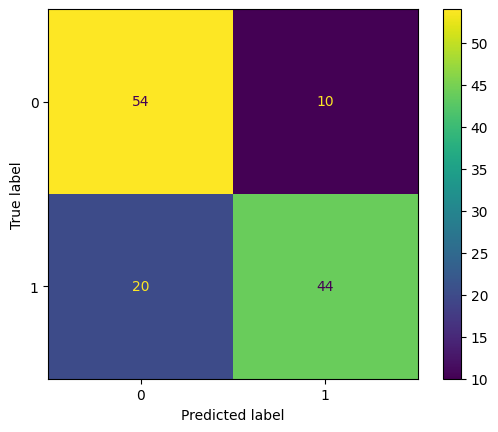

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, x_val_escalado, y_val, values_format='d')


In [ ]:
from sklearn.metrics import precision_score

print(precision_score(y_val, y_pred))

0.8148148148148148


In [ ]:
# Ahora haremos el recall

from sklearn.metrics import recall_score

print(recall_score(y_val, y_pred))

0.6875


In [ ]:
# ahora haremos el f1_score

from sklearn.metrics import f1_score

print(f1_score(y_val, y_pred))

0.7457627118644068


# Resultado: pèsimo

# Tenemos que corregir desbalanceo

In [ ]:
print("Hola mundo")

Hola mundo
